In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [20]:
class neuron:    
    def __init__(self):        
        self.dt = 0.01
        self.max_t = 300
        self.init_t = 0.0
        self.start_time = 50.0
        self.stop_time = 250.0
        self.init_v = -65
        self.ena = 67
        self.gna = 120.0
        self.ek = -83
        self.gk = 36.0
        self.el = -64.387
        self.gl = 0.30

    def alpha_n(self, volt):
        return((0.01 * (volt+55))/(1.0 - (np.exp(-0.1*(55 + volt)))))
    def alpha_m(self, volt):
        return((0.1 * (volt+40))/(1.0 - (np.exp(-0.1*(40 + volt)))))
    def alpha_h(self, volt):
        return(0.07 * (np.exp(-0.05*(65 + volt))))
    def beta_n(self, volt):
        return(0.125 * (np.exp(-0.0125*(65 + volt))))
    def beta_m(self, volt):
        return(4.0 * (np.exp(-0.0556*(65 + volt))))
    def beta_h(self, volt):
        return((1.0)/((np.exp(-0.1*(35 + volt)) + 1.0)))

    def m_dot(self, volt, m):
        return(((self.alpha_m(volt))*(1 - m))-((self.beta_m(volt))*(m)))
    def n_dot(self, volt, n):
        return(((self.alpha_n(volt))*(1 - n))-((self.beta_n(volt))*(n)))
    def h_dot(self, volt, h):
        return(((self.alpha_h(volt))*(1 - h))-((self.beta_h(volt))*(h)))
    def m_infinity(self, volt):
        return(self.alpha_m(volt)/((self.alpha_m(volt) + self.beta_m(volt))))
    def n_infinity(self, volt):
        return(self.alpha_n(volt)/((self.alpha_n(volt) + self.beta_n(volt))))
    def h_infinity(self, volt):
        return(self.alpha_h(volt)/((self.alpha_h(volt) + self.beta_h(volt))))

    


In [21]:
def dvdt(voltage_now, curr_in, hh_m, hh_n, hh_h, neuron):
    dv_dt = curr_in - ( (neuron.gna * (hh_m**3) * hh_h * (voltage_now - neuron.ena)) + (neuron.gk * (hh_n ** 4) * (voltage_now - neuron.ek)) + (neuron.gl * (voltage_now - neuron.el)) )
    return dv_dt

def update(old_value, roc, time_step):
    return ((roc * time_step) + old_value)
    

In [25]:
def run_hh_sim():
    n_sim = neuron()
    time = []
    V = []
    I=[]
    m = []
    n =[]
    h = []
    noise = round(random.uniform(60, 80), 2)
    for idt in range(int(n_sim.max_t/n_sim.dt)):
        if idt%100 == 0:
            noise = round(random.uniform(60, 80), 2)

        time.append(n_sim.dt*idt)
        if time[idt] <= n_sim.start_time or time[idt] >= n_sim.stop_time:
            I.append(0)
            if idt == 0:
                m.append(n_sim.m_infinity(n_sim.init_v))
                n.append(n_sim.n_infinity(n_sim.init_v))
                h.append(n_sim.h_infinity(n_sim.init_v))
                V.append(update(n_sim.init_v, dvdt(n_sim.init_v, I[idt], m[idt], n[idt], h[idt], n_sim), n_sim.dt))
            else:
                m.append(update(m[idt-1], n_sim.m_dot(V[idt-1], m[idt-1]), n_sim.dt))
                n.append(update(n[idt-1], n_sim.n_dot(V[idt-1], n[idt-1]), n_sim.dt))
                h.append(update(h[idt-1], n_sim.h_dot(V[idt-1], h[idt-1]), n_sim.dt))
                V.append(update(V[idt-1], dvdt(V[idt-1], I[idt], m[idt], n[idt], h[idt], n_sim), n_sim.dt))
        if time[idt] > n_sim.start_time and time[idt] < n_sim.stop_time:
            I.append(noise)
            m.append(update(m[idt-1], n_sim.m_dot(V[idt-1], m[idt-1]), n_sim.dt))
            n.append(update(n[idt-1], n_sim.n_dot(V[idt-1], n[idt-1]), n_sim.dt))
            h.append(update(h[idt-1], n_sim.h_dot(V[idt-1], h[idt-1]), n_sim.dt))
            V.append(update(V[idt-1], dvdt(V[idt-1], I[idt], m[idt], n[idt], h[idt], n_sim), n_sim.dt))
        
    return V, I, time

v, i, t = run_hh_sim()

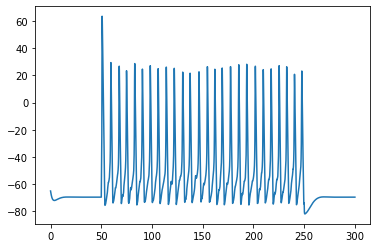

In [27]:
plt.plot(t, v)

Text(0.5, 0, 'Time (msec.)')

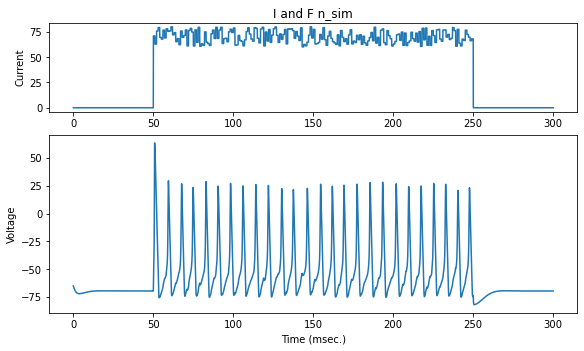

In [28]:
fig = plt.figure(figsize=(8, 6), constrained_layout=True)
spec = fig.add_gridspec(4, 4)
ax0 = fig.add_subplot(spec[0, :])
ax0.plot(t, i)
ax0.set_ylabel("Current")
ax10 = fig.add_subplot(spec[1:3, :], sharex = ax0)
ax0.set_title("I and F n_sim")
ax10.plot(t, v)
ax10.set_ylabel("Voltage")
ax10.set_xlabel("Time (msec.)")